<a href="https://colab.research.google.com/github/vladleshchuk/Time-Series-Forecasting-of-Rivne-Region-Climate-Characteristics/blob/main/1_Rivne_Temp_Mounths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 1_temp.xlsx to 1_temp (4).xlsx


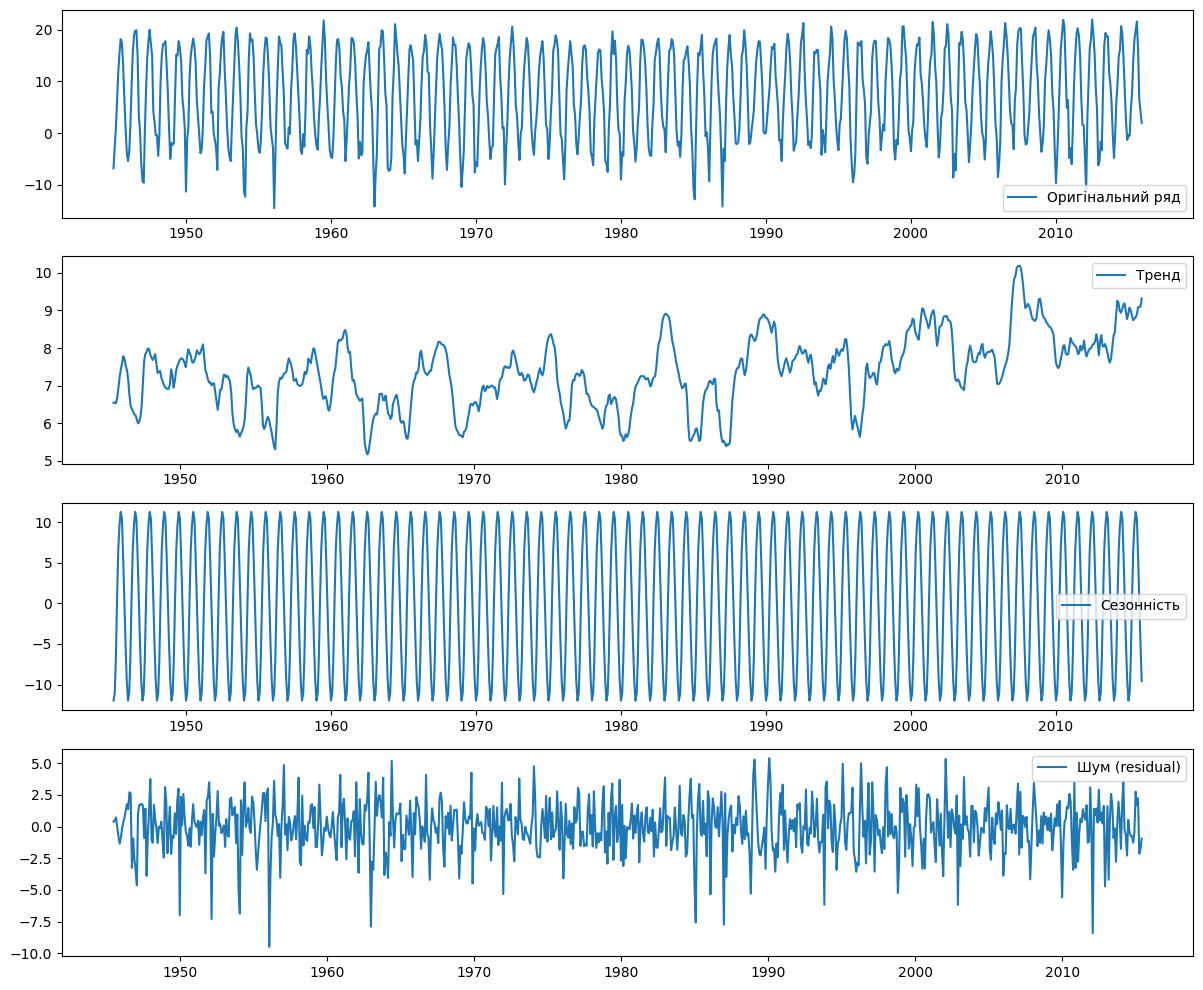

In [ ]:
import pandas as pd #для роботи з табличними даними (DataFrame).
from statsmodels.tsa.seasonal import seasonal_decompose #функція для декомпозиції часового ряду (тренд, сезонність, шум).
import matplotlib.pyplot as plt #для побудови графіків.
from google.colab import files #модуль Google Colab для завантаження файлів вручну.

# Завантаження Excel-файлу
uploaded = files.upload()
file = "1_temp.xlsx"
df = pd.read_excel(file) #Зчитування завантаженого Excel-файлу у DataFrame df.

# Перетворення 'DATE' у datetime
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True)  # dayfirst=True бо формат український (день.місяць.рік)
df.set_index('DATE', inplace=True) #встановлення дати як індексу DataFrame (для подальшої обробки як часового ряду).

# Вибираємо лише ряд температур
rivne_series = df['RIVNE']

# Декомпозиція з періодом 12 місяців (для щомісячних даних)
decomposition = seasonal_decompose(rivne_series, model='additive', period=12)

# Побудова графіків
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(rivne_series, label='Оригінальний ряд')
plt.legend() #Перший графік: оригінальний часовий ряд температур.

plt.subplot(412)
plt.plot(decomposition.trend, label='Тренд')
plt.legend() #Другий графік: тренд — загальна тенденція зміни температур з роками.

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Сезонність')
plt.legend() #Третій графік: сезонна складова — періодичні коливання, які повторюються щороку.

plt.subplot(414)
plt.plot(decomposition.resid, label='Шум (residual)')
plt.legend() #Четвертий графік: залишкова складова (шум) — те, що не пояснюється ні трендом, ні сезонністю.

plt.tight_layout() #оптимізує розміщення графіків, щоб не перекривалися.
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9fy5b21m/eyjuy8p0.json


Saving 1_temp.xlsx to 1_temp (5).xlsx


DEBUG:cmdstanpy:input tempfile: /tmp/tmp9fy5b21m/ctqszmmk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74599', 'data', 'file=/tmp/tmp9fy5b21m/eyjuy8p0.json', 'init=/tmp/tmp9fy5b21m/ctqszmmk.json', 'output', 'file=/tmp/tmp9fy5b21m/prophet_modele60bzszv/prophet_model-20250605170834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:08:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:08:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


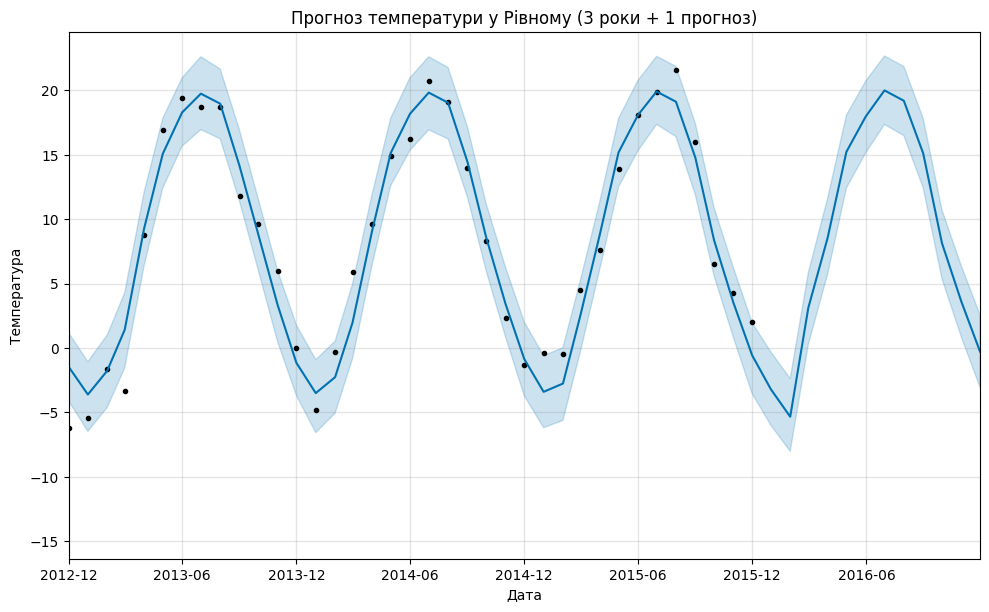

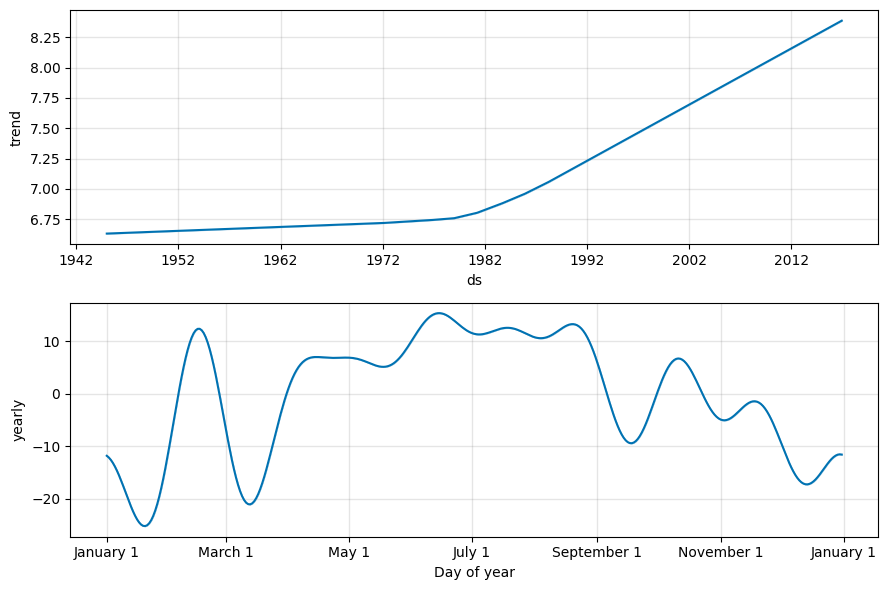

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from google.colab import files

# Завантаження Excel (якщо ще не завантажено)
uploaded = files.upload()

# Зчитування Excel-файлу
file = "1_temp.xlsx"
df = pd.read_excel(file)

# Перетворення дати
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True)

# Перейменування колонок для Prophet
df_prophet = df.rename(columns={'DATE': 'ds', 'RIVNE': 'y'})

# Створення та навчання моделі
model = Prophet(yearly_seasonality=True, seasonality_mode='additive')
model.fit(df_prophet)

# Прогноз на 1 рік (12 місяців)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# 📅 Відображення тільки останніх 3 років + 1 рік прогнозу
last_date = df_prophet['ds'].max()
start_display = last_date - pd.DateOffset(years=3)
end_display = forecast['ds'].max()

# Побудова графіка прогнозу з обмеженням по осі X
fig1 = model.plot(forecast)
plt.xlim([start_display, end_display])
plt.title("Прогноз температури у Рівному (3 роки + 1 прогноз)")
plt.ylabel("Температура")
plt.xlabel("Дата")
plt.grid(True)
plt.show()

# Компоненти прогнозу
fig2 = model.plot_components(forecast)
plt.show()


ГЛАДКІШЕ


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9fy5b21m/xsdvdr8j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9fy5b21m/tjj18r0m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36083', 'data', 'file=/tmp/tmp9fy5b21m/xsdvdr8j.json', 'init=/tmp/tmp9fy5b21m/tjj18r0m.json', 'output', 'file=/tmp/tmp9fy5b21m/prophet_model594lusw3/prophet_model-20250605145523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:55:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Saving 1_temp.xlsx to 1_temp (2).xlsx


14:55:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


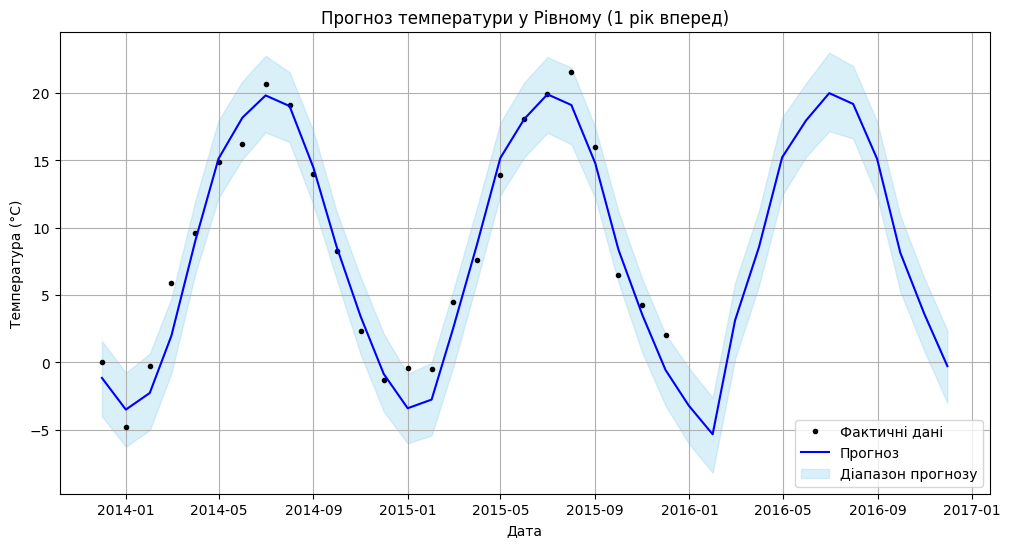

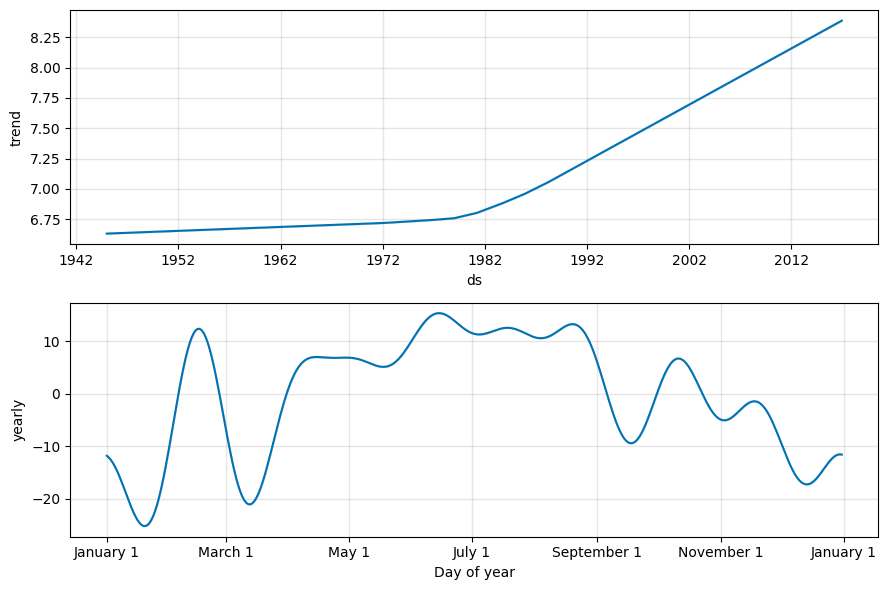

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from google.colab import files

# Завантаження Excel-файлу
uploaded = files.upload()
file = "1_temp.xlsx"
df = pd.read_excel(file)

# Перетворення дати
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True)

# Підготовка даних для Prophet
df_prophet = df.rename(columns={'DATE': 'ds', 'RIVNE': 'y'})

# Створення та навчання моделі Prophet з більш м’якою сезонністю
model = Prophet(
    yearly_seasonality=True,
    seasonality_mode='additive',
    seasonality_prior_scale=10  # Підгладжує сезонність
)
model.fit(df_prophet)

# Прогноз на 1 рік (12 місяців)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Фільтрація для відображення лише останніх 3 років
last_date = df_prophet['ds'].max()
start_date = last_date - pd.DateOffset(years=2)
mask = (forecast['ds'] >= start_date)
forecast_trimmed = forecast[mask]
df_trimmed = df_prophet[df_prophet['ds'] >= start_date]

# Побудова графіка
plt.figure(figsize=(12, 6))
plt.plot(df_trimmed['ds'], df_trimmed['y'], 'ko', markersize=3, label='Фактичні дані')
plt.plot(forecast_trimmed['ds'], forecast_trimmed['yhat'], 'b-', label='Прогноз')
plt.fill_between(forecast_trimmed['ds'], forecast_trimmed['yhat_lower'], forecast_trimmed['yhat_upper'],
                 color='skyblue', alpha=0.3, label='Діапазон прогнозу')
plt.xlabel("Дата")
plt.ylabel("Температура (°C)")
plt.title("Прогноз температури у Рівному (1 рік вперед)")
plt.legend()
plt.grid(True)
plt.show()

# Компоненти тренду та сезонності
fig2 = model.plot_components(forecast)
plt.show()
